__1. Introduction__

The dataset contains information gotten from various IT employee positions and levels in the Europe. The aim of this project is to perform an exploratory data analysis and gain insights into data like the salary, programming language, company type and size of employees in Europe and also compare data between cities to see how they may vary.

First,we import our dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Read in our data

In [2]:
data=pd.read_csv('it_salary.csv')
data.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


The data contains information about the age, city, years of experience, seniority level as well as yearly salary and yearly bonus of the developers.

__2. Features of the data__

Next explore the features of the data like the shape, important stats of each variable and missing data values

In [3]:
data.shape

(1253, 23)

The data contains 1253 rows or instances and 23 columns or variables.

In [4]:
data.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [6]:
data.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

We seem to have missing data values in most of the rows and thus,have to carry out some data cleaning activity to deal with the missing data

__3. Data cleaning__

For the sake of the analysis, we would drop some columns which might not be necessary to getting the insights we desire. Some of these columns also seem to have the most missing values in the dataset.
These columns include:
  * Timestamp
  * Years of experience in Germany
  * Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country   
  * Annual bonus+stocks one year ago. Only answer if staying in same country  
  * Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR
  * Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week 

In [7]:
data.drop(data.columns[[-1,-2,0,6,12,13]], axis=1, inplace=True)
data.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


In [8]:
data.isna().sum()

Age                                                         27
Gender                                                      10
City                                                         0
Position                                                     6
Total years of experience                                   16
Seniority level                                             12
Your main technology / programming language                127
Other technologies/programming languages you use often     157
Yearly brutto salary (without bonus and stocks) in EUR       0
Yearly bonus + stocks in EUR                               424
Number of vacation days                                     68
Employment status                                           17
Сontract duration                                           29
Main language at work                                       16
Company size                                                18
Company type                                           

After dropping these columns, we still have some missing data. So we will carry out a column wise exploration to treat the mising data.

In [9]:
data['Age'].unique()

array([26., 29., 28., 37., 32., 24., 35., nan, 34., 31., 41., 27., 25.,
       59., 36., 38., 40., 39., 33., 30., 49., 48., 44., 66., 45., 43.,
       42., 46., 47., 56., 53., 65., 22., 23., 50., 51., 21., 20., 54.,
       69., 52.])

In [10]:
data[data['Age'].isna()]
data.drop([1180, 1181, 1231], axis=0, inplace=True)

In addition to having missing age values, some instances seem to also have other variables missing so they are dropped.

In [11]:
data['Gender'].unique()

array(['Male', 'Female', nan, 'Diverse'], dtype=object)

In [12]:
data[data['Gender'].isna()]
data.drop([473], axis=0, inplace=True)

In [13]:
data['Seniority level'].unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'VP', 'Manager', 'Work Center Manager', 'CTO', 'No level ',
       'Director', 'Key', 'C-level executive manager', 'Principal',
       'intern', 'Student', 'no idea, there are no ranges in the firm ',
       'C-Level', 'Working Student', 'Entry level', 'Intern', 'student',
       'Self employed'], dtype=object)

In [14]:
data[data['Seniority level'].isna()]

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
68,48.0,Male,London,Data Engineer,23,NaN,Google Cloud Platform,"Python, SQL, Go, Google Cloud, bash",110000.0,NaN,NaN,Company Director,Temporary contract,English,up to 10,Personal Ltd,Yes
357,26.0,Male,Karlsruhe,Software Engineer,5,NaN,NaN,"Python, Kotlin, Javascript / Typescript, Java ...",55000.0,0,30,Full-time employee,Unlimited contract,50/50,11-50,Consulting / Agency,No
499,24.0,Male,Cologne,Data Scientist,1,NaN,Python,"SQL, Google Cloud, Kubernetes, Docker",57600.0,7000,27,Full-time employee,Unlimited contract,English,11-50,Consulting / Agency,No
525,37.0,Male,Berlin,Data Analyst,3,NaN,Python,SQL,67000.0,0,21,Full-time employee,Unlimited contract,English,1000+,Product,No
913,24.0,Male,Berlin,ML Engineer,3,NaN,NaN,NaN,90000.0,NaN,NaN,NaN,NaN,NaN,NaN,Startup,NaN
1014,32.0,Female,Heidelberg,Software Engineer,8,NaN,Typescript,"Javascript / Typescript, .NET, C#, Angular",60000.0,NaN,24,Full-time employee,Unlimited contract,English,101-1000,Product,Yes
1016,31.0,Male,Munich,DevOps,8,NaN,NaN,"Kubernetes, Docker",62000.0,4000,27,Full-time employee,Unlimited contract,English,51-100,Product,No
1241,30.0,Male,Berlin,SRE,10,NaN,Kubernetes,"Go, Kubernetes",68000.0,NaN,26,Full-time employee,Unlimited contract,English,101-1000,Product,No


In [15]:
data[data['Your main technology / programming language'].isna()]

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
14,28.0,Male,Berlin,Designer (UI/UX),11,Senior,NaN,NaN,75000.0,9400,30,Full-time employee,Unlimited contract,English,1000+,Product,Yes
17,41.0,Male,Berlin,Product Manager,18,Senior,NaN,SQL,78000.0,NaN,28,Full-time employee,Unlimited contract,English,51-100,Startup,Yes
20,34.0,Male,Berlin,DevOps,13,Senior,NaN,NaN,103000.0,NaN,30,Full-time employee,Unlimited contract,English,1000+,Product,NaN
28,NaN,Male,Berlin,DevOps,14,Senior,NaN,"Python, Go, AWS, Kubernetes, Docker",67000.0,7000,30,Full-time employee,Unlimited contract,English,101-1000,Product,No
32,29.0,Female,Berlin,QA Engineer,7,Middle,NaN,Javascript / Typescript,45000.0,2000,26,Full-time employee,Unlimited contract,English,51-100,Startup,No
46,28.0,Female,Berlin,Designer (UI/UX),5,Senior,NaN,NaN,60000.0,NaN,20,Full-time employee,Unlimited contract,English,1000+,Product,No
48,38.0,Female,Berlin,Backend Developer,12,Senior,NaN,C/C++,70000.0,8000,28,Full-time employee,Unlimited contract,English,1000+,Product,No
52,29.0,Female,Berlin,QA Engineer,8,Senior,NaN,NaN,60000.0,NaN,28,Full-time employee,Unlimited contract,English,51-100,Startup,Yes
66,32.0,Male,Berlin,Data Scientist,10,Head,NaN,NaN,110000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Consulting / Agency,No
76,30.0,Male,Munich,DevOps,8,Middle,NaN,NaN,70200.0,75000,30,Full-time employee,Unlimited contract,English,1000+,Product,No


In [16]:
data['Total years of experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

The 'total years of experience' variable seems to have values that are not numeric so we replace them with corresponding numeric values and then convert the variable to numeric data type since it was saved as an object data type

In [17]:
data.replace({'1 (as QA Engineer) / 11 in total':'11', '2,5': '4', '15, thereof 8 as CTO':'15', '6 (not as a data scientist, but as a lab scientist)': '6','383':'0', '1,5':'3', 'less than year':'0'  }, inplace=True)

In [18]:
data['Total years of experience']=pd.to_numeric(data['Total years of experience'])

In [19]:
data['Number of vacation days'].unique()

array(['30', '28', '24', '29', '27', nan, '25', '31', '26', '60', '20',
       '22', '38', '35', '32', '40', '365', '36', '23', '33', '21',
       'unlimited', '14', 'unlimited ', '(no idea)',
       '30 in contract (but theoretically unlimited)', '0', 'Unlimited ',
       '15', '16', '3', '45', '~25', '12', '50', '23+', '99', 'Unlimited',
       '24 labour days', '37.5', '1', '5', '37', '39', '34', '10'],
      dtype=object)

The same process carried out for the previous variable is done for the 'number of vacation days' variable

In [20]:
data.replace({ 'unlimited':'100', 'unlimited ':'100', '(no idea)':'0',  '30 in contract (but theoretically unlimited)':'100', 'Unlimited ':'100','~25':'25', 'Unlimited':'100', '24 labour days':'24', '23+':'24'  }, inplace=True)

In [21]:
data['Yearly bonus + stocks in EUR'].unique()
data.replace({ 'bvg only':'0', 'depends':'0', '15000+-':'15000',  'Na':'0', '-':'0','Not sure':'0'}, inplace=True)

In [22]:
data['Yearly bonus + stocks in EUR']=pd.to_numeric(data['Yearly bonus + stocks in EUR'])

In [23]:
data['Number of vacation days']=pd.to_numeric(data['Number of vacation days'])

In [49]:
data['Company type'].unique()

array(['Product', 'Startup', 'Consulting / Agency', nan, 'Media',
       'Personal Ltd', 'Cloud', 'Behörde', 'Construction',
       'Big commercial', 'Outsorce', 'Bank ', 'Fintech', 'Automotive',
       'Bank', 'IT Department of established business',
       'Telecommunications', 'E-commerce', 'Systemhaus', 'University',
       'consumer goods', 'IT-Outsourcing', 'Game Company', 'Financial ',
       'Corporation', 'Publishing and Technology', 'Market Research ',
       'e-commerce', 'SaaS', 'Publisher', 'Energy ', 'Enterprise',
       'Bloody enterprise', 'service', 'Concern', 'Utilities',
       'Insurance', 'Science Institute ', 'Research institute', 'Retail',
       'Ecommerce', 'E-Commerce', 'Semiconductor', 'Automotive ',
       'Institute', 'Finance', 'Handel ', 'Consulting and Product',
       'Education', 'Pharma',
       'Full-time position in Education, part-time position in at a data startup',
       'Corporation ', 'Transport & Logistics', 'Biergarten ',
       'Non-tech re

In [50]:
data.replace({'e-commerce':'E-commerce', 'Ecommerce':'E-commerce', 'E-Commerce':'E-commerce', 'Bank ':'Finance', 'Outsorce':'IT-Outsourcing','Outsourse':'IT-Outsourcing', 'Financial ':'Finance', 'Corporation ':'Corporation', 'Research':'Research institute', 'Non-tech retail': 'Retail', 'Science Institute ':'Research institute', 'Publishing and Technology':'Media', 'Consulting and Product':'Consulting / Agency', 'consumer goods': 'E-commerce','IT Department of established business':'Corporation', 'service':'SaaS', 'Full-time position in Education, part-time position in at a data startup':'Education', 'Old industry':'Industry', 'freelance':'Personal Ltd', 'eCommerce':'E-commerce', 'Publisher':'Media', 'Bloody enterprise':'Enterpise', 'Concern':'Other', 'Utilities':'Other', 'University':'Education','Semiconductor':'Other','FAANG':'Corporation', 'Biergarten ':'Other', 'Enterpise':'Corporation', 'Telecommunications':'Corporation', 'Enterprise': 'Corporation', 'Market Research ':'Research institute', 'corporate incubator':'Corporation', 'Big commercial': 'E-commerce', 'Multinational ':'Corporation', 'Pharma':'Other', 'Behörde':'Other', 'Systemhaus':'Other', 'Energy ':'Other', 'Game Company':'Product', 'Automotive ':'Transport & Logistics', 'Institute': 'Research institute', 'Handel ':'Other', 'SaaS':'Product', 'Bank':'Finance', 'Insurance':'Finance', 'Fintech':'Finance', 'Cloud':'Product','Retail': 'E-commerce', 'Construction':'Industry'}, inplace=True)  

In [32]:
data['Seniority level'].unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'VP', 'Manager', 'Work Center Manager', 'CTO', 'No level ',
       'Director', 'Key', 'C-level executive manager', 'Principal',
       'intern', 'Student', 'no idea, there are no ranges in the firm ',
       'C-Level', 'Working Student', 'Entry level', 'Intern', 'student',
       'Self employed'], dtype=object)

In [33]:
data.replace({'Student':'Working Student', 'student':'Working Student', 'C-level executive manager': 'C-Level', 'CTO':'C-Level', 'no idea, there are no ranges in the firm ':'No level ','intern':'Intern', 'Self employed': 'No level ', 'No level':'No level ', 'Work Center Manager':'Manager', 'Key':'No level ', 'VP': 'C-Level','Entry level':'Junior','Principal':'Director' }, inplace=True)

__4. Exploratory Data Analysis__

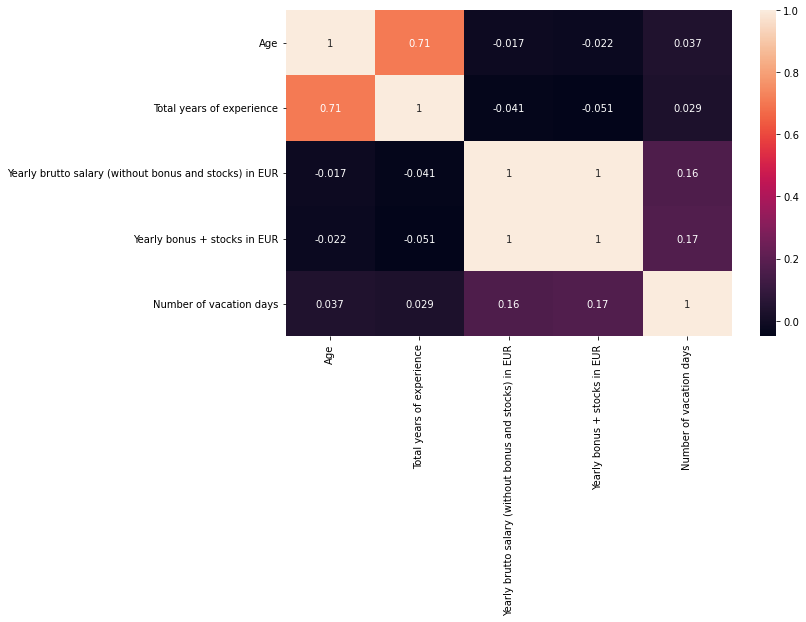

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

From the heatmap, we can see that there is practically no linear correlation between the variables except the age and total years of experience which has a strong positive linear correlation as expected.

__Univariate Analysis__

* AGE

In [94]:
print('The mean age of the employees surveyed is {}'. format(data['Age'].mean()))
print('The median age of the employees surveyed is {}'. format(data['Age'].median()))

The mean age of the employees surveyed is 32.50978792822186
The median age of the employees surveyed is 32.0


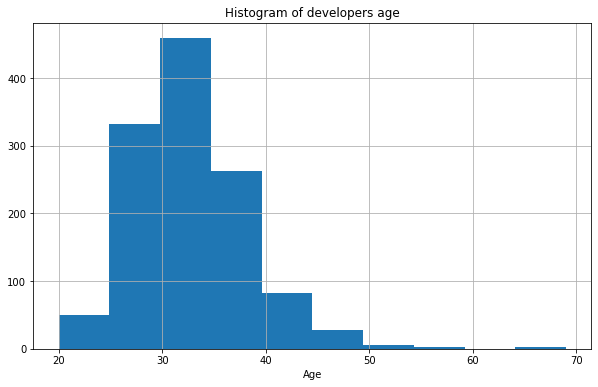

In [26]:
plt.figure(figsize=(10,6))
data['Age'].hist()
plt.title('Histogram of developers age')
plt.xlabel('Age')
plt.show()

The age of the IT employees is normally distributed with most of the ages being between 30 and 35 years

* GENDER

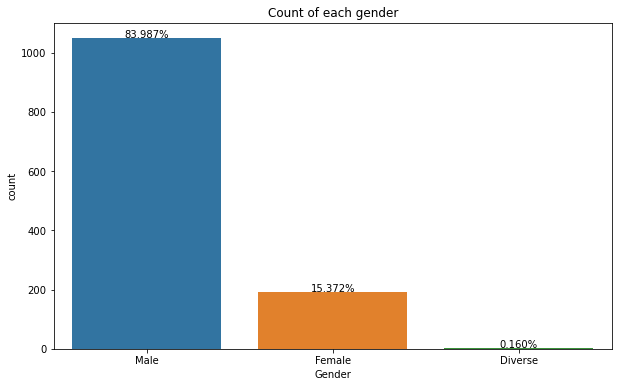

In [27]:
plt.figure(figsize=(10,6))
total=float(len(data['Gender']))
gend=sns.countplot(x='Gender', data=data)
for g in gend.patches:
    height=g.get_height()
    gend.text(g.get_x()+g.get_width()/2, height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Count of each gender')
plt.xlabel('Gender')
plt.show()

83% of the employees surveyed are male while 15% are female and 0.16% identify as diverse. This shows that there is a great disparity in the sample size considered for the study.

* CITY

In [28]:
data['City'].value_counts()

Berlin                   678
Munich                   235
Frankfurt                 44
Hamburg                   40
Stuttgart                 26
Cologne                   20
Amsterdam                  9
Stuttgart                  7
Prague                     6
Karlsruhe                  6
Moscow                     6
Düsseldorf                 6
Stockholm                  5
Zurich                     5
London                     5
Düsseldorf                 4
Helsinki                   4
Nürnberg                   4
Heidelberg                 4
Darmstadt                  3
Wolfsburg                  3
Tallinn                    3
Bonn                       3
Dusseldorf                 3
Mannheim                   3
Rome                       3
Hannover                   3
Boeblingen                 3
Milan                      2
Siegen                     2
Nuremberg                  2
Kyiv                       2
Regensburg                 2
Paris                      2
Lisbon        

Most of th developers sureyed wok in German cities with the greatest number of developers working in Berlin.

* POSITION

In [29]:
data['Position '].value_counts()

Software Engineer                               387
Backend Developer                               174
Data Scientist                                  110
Frontend Developer                               89
QA Engineer                                      71
DevOps                                           57
Mobile Developer                                 53
ML Engineer                                      42
Product Manager                                  39
Data Engineer                                    25
Designer (UI/UX)                                 16
Engineering Manager                              10
Data Analyst                                      8
CTO                                               5
SRE                                               4
Fullstack Developer                               4
Project Manager                                   4
Software Architect                                4
Team Lead                                         3
Hardware Eng

* TOTAL YEARS OF EXPERIENCE

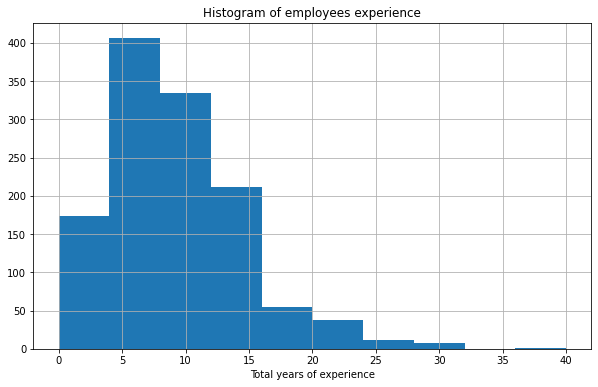

In [111]:
plt.figure(figsize=(10,6))
data['Total years of experience'].hist()
plt.title('Histogram of employees experience')
plt.xlabel('Total years of experience')
plt.show()

The 'years of experience' variable is right skewed with most employees having between about 4-7 total years of experience

* SENIORITY LEVEL

In [34]:
data['Seniority level'].unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level ',
       'C-Level', 'Manager', 'Director', 'Intern', 'Working Student'],
      dtype=object)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


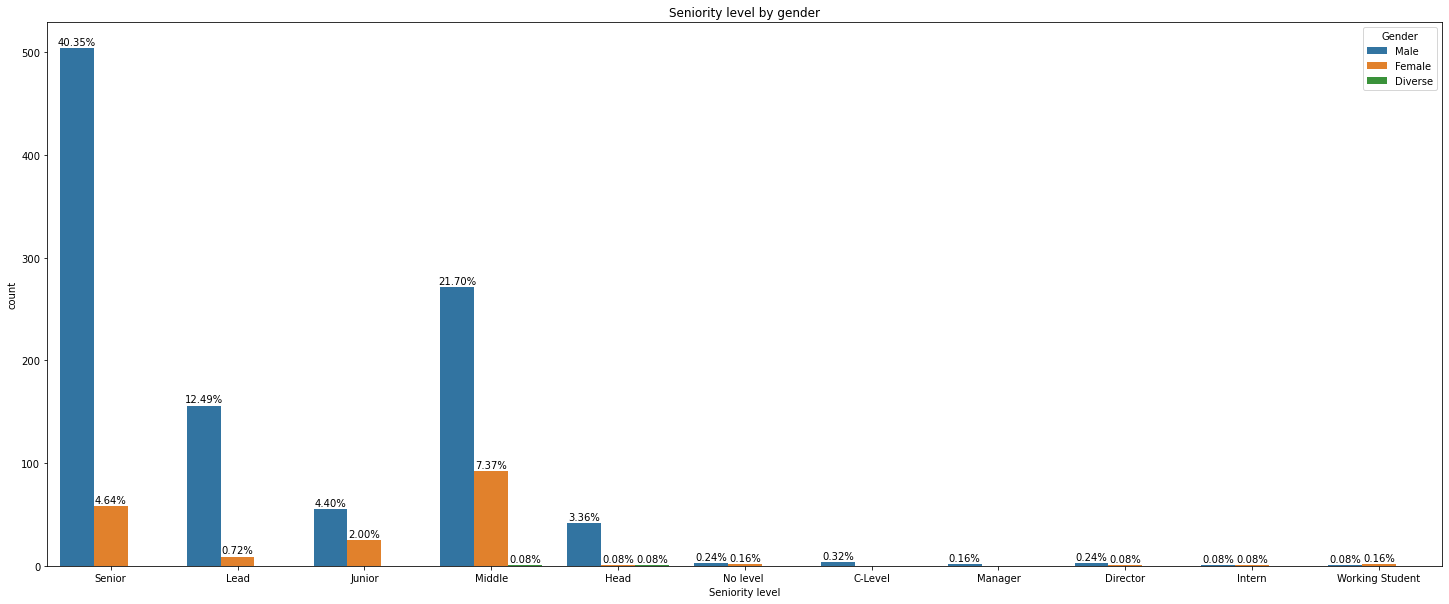

In [36]:
plt.figure(figsize=(25,10))
total=float(len(data['Seniority level']))
sen=sns.countplot(x='Seniority level',hue='Gender', data=data)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Seniority level by gender')
plt.xlabel('Seniority level')
plt.show()

The count plot shows the seniority level of employees by gender. About 45% of the surveyed employees are senior level with only 4.6% of that number being female. This could be attributed to the disparity in data collection  between genders.

* YEARLY SALARY

In [37]:
print('The mean yearly salary without bonus of the developers surveyed is {}'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'].mean()))
print('The median yearly salary without bonus of the developers surveyed is {}'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'].median()))

The mean yearly salary without bonus of the developers surveyed is 471920.92964771815
The median yearly salary without bonus of the developers surveyed is 70000.0


Dividing the yearly salary into categories for better exploration.

In [38]:
data['cat_salary']=pd.cut(data['Yearly brutto salary (without bonus and stocks) in EUR'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 1000000])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


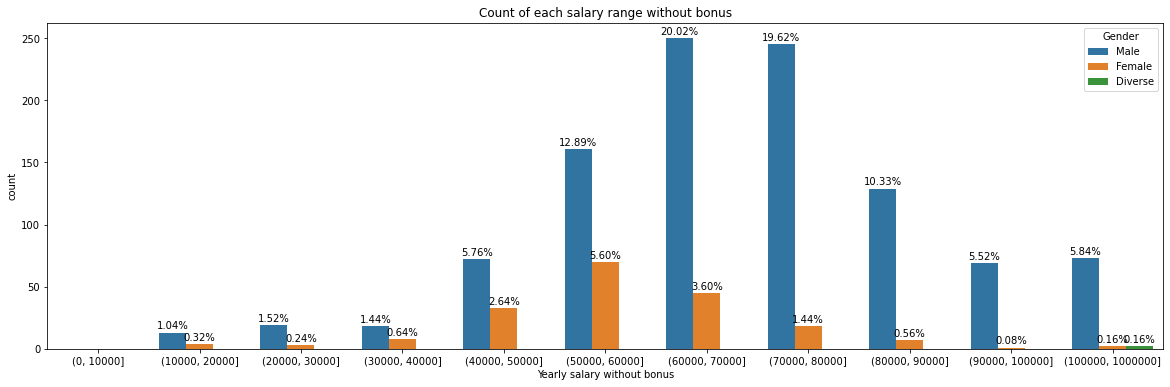

In [39]:
plt.figure(figsize=(20,6))
total=float(len(data['cat_salary']))
cat=sns.countplot(x='cat_salary',hue='Gender', data=data)
for g in cat.patches:
    height=g.get_height()
    cat.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Count of each salary range without bonus')
plt.xlabel('Yearly salary without bonus')
plt.show()

About 24% of the employees surveyed earn  between  60,000 and 70,000 euros  while about 21% earn  between 70,000 and 80,000 euros yearly

* YEARLY BONUS

In [40]:
print('The mean yearly bonus of the developers surveyed is {}'.format(data['Yearly bonus + stocks in EUR'].mean()))
print('The median yearly bonus of the developers surveyed is {}'.format(data['Yearly bonus + stocks in EUR'].median()))

The mean yearly bonus of the developers surveyed is 6052761.6446924005
The median yearly bonus of the developers surveyed is 5000.0


Dividing the yearly bonus into categories for better exploration.

In [41]:
data['cat_bonus']=pd.cut(data['Yearly bonus + stocks in EUR'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 1000000])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


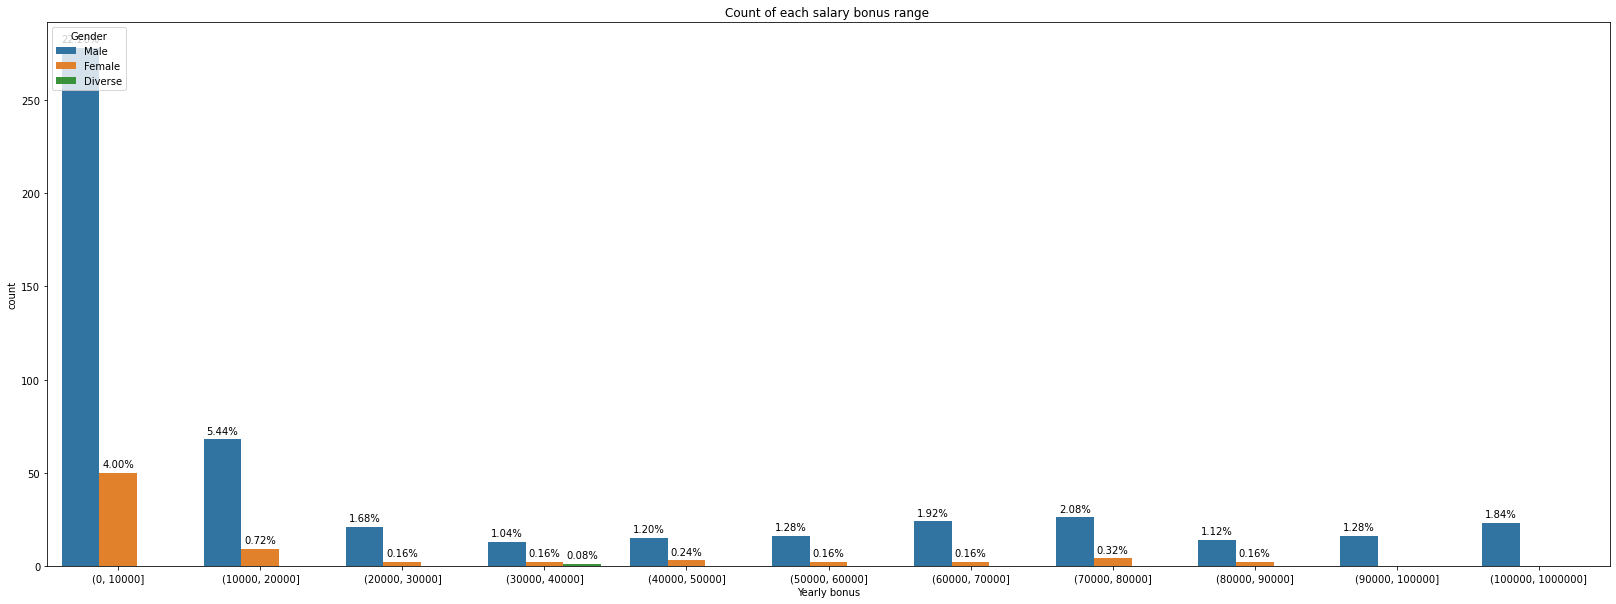

In [42]:
plt.figure(figsize=(28,10))
total=float(len(data['cat_bonus']))
cat=sns.countplot(x='cat_bonus', hue='Gender',data=data)
for g in cat.patches:
    height=g.get_height()
    cat.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Count of each yearly salary bonus range')
plt.xlabel('Yearly bonus')
plt.show()

Most employees surveyed seem to have a yearly bonus between 0 and 10000 euros yearly.

* EMPLOYMENT STATUS

In [43]:
data['Employment status'].unique()

array(['Full-time employee', 'Self-employed (freelancer)',
       'Company Director', nan, 'Founder', 'Part-time employee',
       'working student', 'Working Student',
       'Full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'Intern',
       "full-time, but 32 hours per week (it was my request, I'm a student)",
       'Werkstudent'], dtype=object)

In [44]:
data['Employment status'].value_counts()

Full-time employee                                                                 1190
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: Employment status, dtype: 

In [45]:
data.replace({'working student':'Working Student', 'Full-time position, part-time position, & self-employed (freelancing, tutoring)':'Full-time employee', "full-time, but 32 hours per week (it was my request, I'm a student)":'Full-time employee',  'Werkstudent':'Working Student' }, inplace=True)

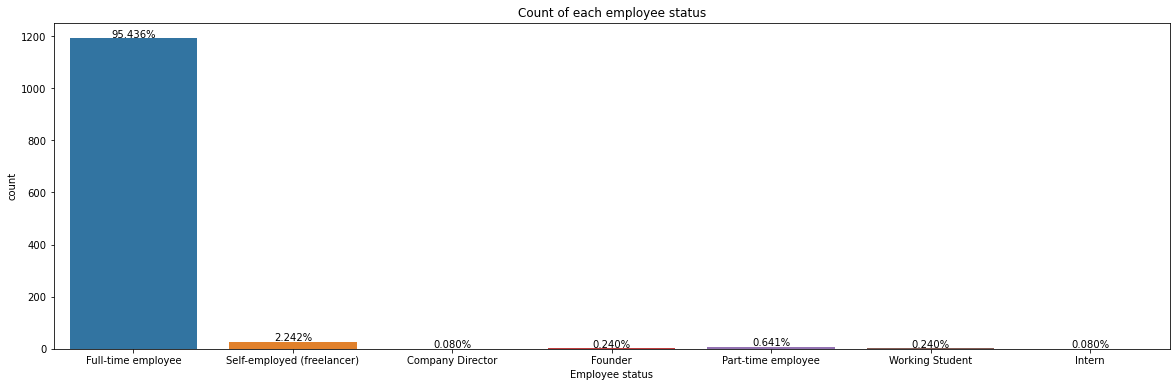

In [119]:
plt.figure(figsize=(20,6))
total=float(len(data['Employment status']))
emp=sns.countplot(x='Employment status', data=data)
for g in emp.patches:
    height=g.get_height()
    emp.text(g.get_x()+g.get_width()/2, height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Count of each employee status')
plt.xlabel('Employee status')
plt.show()

More than 95% of the IT employees surveyed are full time employees.

* COMPANY SIZE

In [47]:
data['Company size'].unique()

array(['51-100', '101-1000', '11-50', '1000+', nan, 'up to 10'],
      dtype=object)

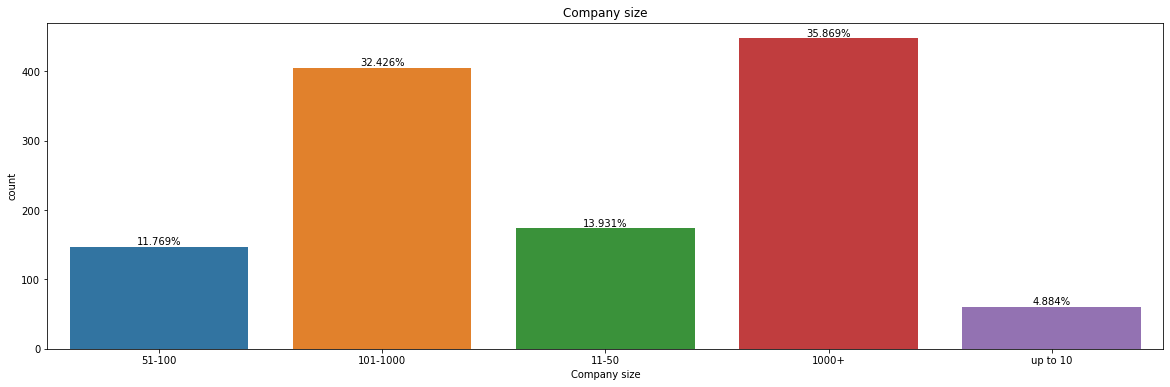

In [48]:
plt.figure(figsize=(20,6))
total=float(len(data['Company size']))
con=sns.countplot(x='Company size', data=data)
for g in con.patches:
    height=g.get_height()
    con.text(g.get_x()+g.get_width()/2, height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Company size')
plt.xlabel('Company size')
plt.show()

* COMPANY TYPE

In [51]:
data['Company type'].unique()

array(['Product', 'Startup', 'Consulting / Agency', nan, 'Media',
       'Personal Ltd', 'Other', 'Industry', 'E-commerce',
       'IT-Outsourcing', 'Finance', 'Automotive', 'Corporation',
       'Education', 'Research institute', 'Enterpise', 'SaaS',
       'Transport & Logistics', 'Retail'], dtype=object)

In [52]:
data['Company type'].value_counts()

Product                  763
Startup                  252
Consulting / Agency      143
Finance                   12
Other                     10
E-commerce                10
Corporation                9
Research institute         6
Media                      5
Education                  4
Industry                   3
IT-Outsourcing             3
Personal Ltd               2
Transport & Logistics      2
Automotive                 1
Enterpise                  1
SaaS                       1
Retail                     1
Name: Company type, dtype: int64

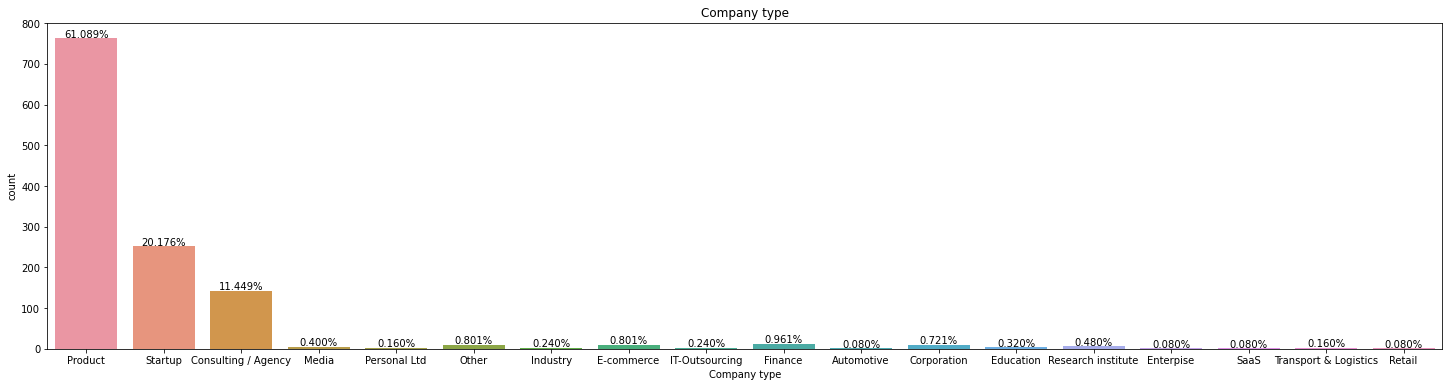

In [93]:
plt.figure(figsize=(25,6))
total=float(len(data['Company type']))
com=sns.countplot(x='Company type', data=data)
for g in com.patches:
    height=g.get_height()
    com.text(g.get_x()+g.get_width()/2, height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Company type')
plt.xlabel('Company type')
plt.show()

More thn 61% of the surveyed IT employees work in  a product company

__Bivariate Analysis__

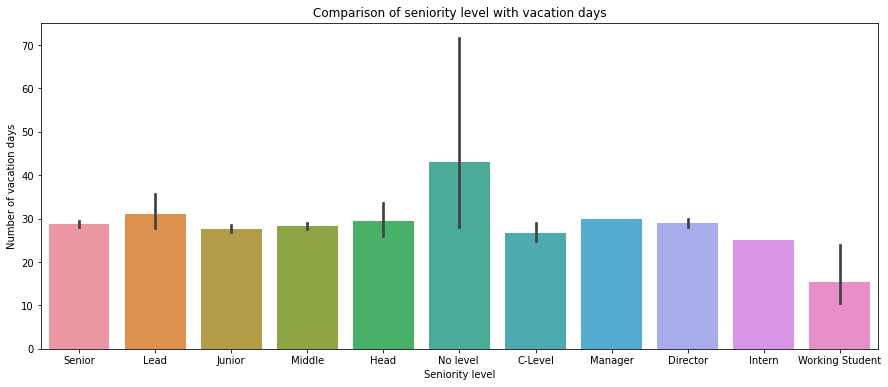

In [116]:
plt.figure(figsize=(15,6))
sns.barplot(x=data['Seniority level'], y=data['Number of vacation days'])
plt.title('Comparison of seniority level with vacation days')
plt.show()

Employees with no level seem to have the most vacation days which is understandable because this includes self employed individuals who may decide to a break any time.

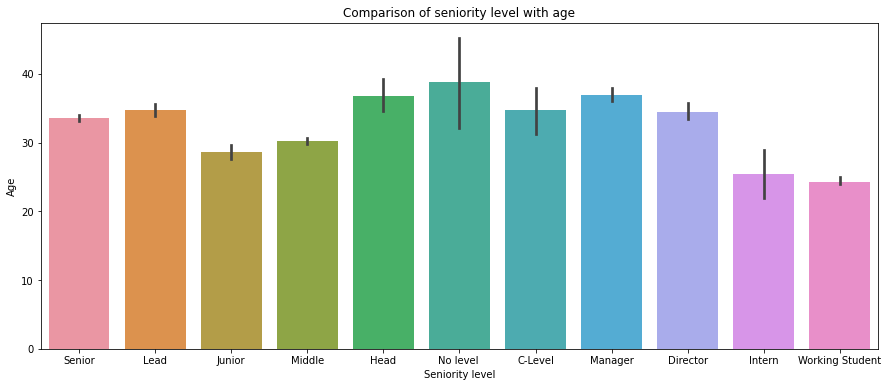

In [117]:
plt.figure(figsize=(15,6))
sns.barplot(x=data['Seniority level'], y=data['Age'])
plt.title('Comparison of seniority level with age')
plt.show()

As expected, seniority level increases with age.

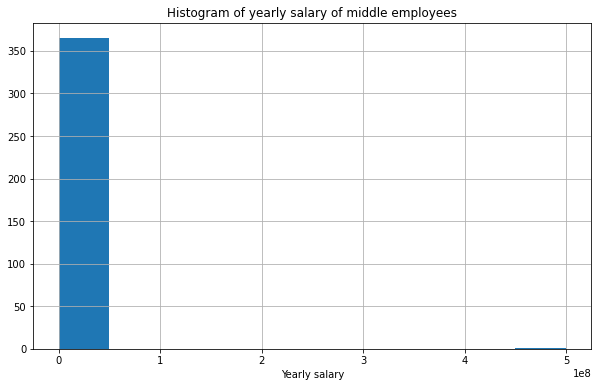

In [114]:
plt.figure(figsize=(10,6))
data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Middle'].hist()
plt.title('Histogram of yearly salary of middle employees')
plt.xlabel('Yearly salary')
plt.show()

In [115]:
print('The mean yearly salary of middle employees is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Middle'].mean()))
print('The median yearly salary of middle employees is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Middle'].median()))

The mean yearly salary of middle employees is 1424583.6147540985 euros
The median yearly salary of middle employees is 60000.0 euros


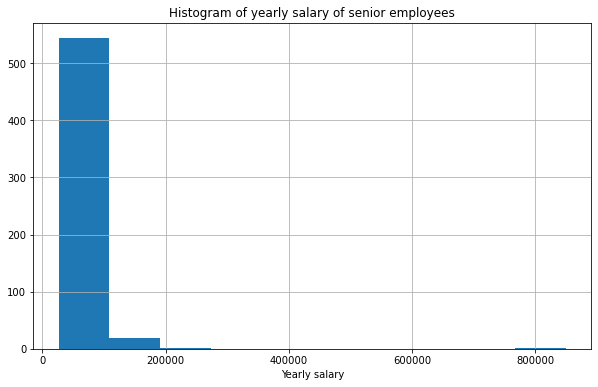

In [98]:
plt.figure(figsize=(10,6))
data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Senior'].hist()
plt.title('Histogram of yearly salary of senior employees')
plt.xlabel('Yearly salary')
plt.show()

In [105]:
print('The mean yearly salary of senior employees is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Senior'].mean()))
print('The median yearly salary of senior employees is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Senior'].median()))

The mean yearly salary of senior employees is 75510.62831858407 euros
The median yearly salary of senior employees is 72000.0 euros


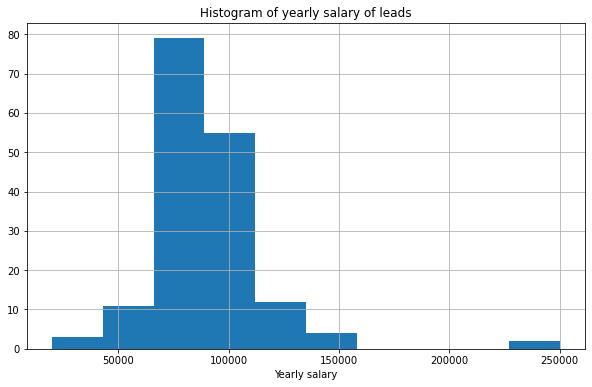

In [120]:
plt.figure(figsize=(10,6))
data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Lead'].hist()
plt.title('Histogram of yearly salary of leads')
plt.xlabel('Yearly salary')
plt.show()

In [106]:
print('The mean yearly salary of lead employees is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Lead'].mean()))
print('The median yearly salary of lead employees is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Lead'].median()))

The mean yearly salary of lead employees is 88722.7108433735 euros
The median yearly salary of lead employees is 85000.0 euros


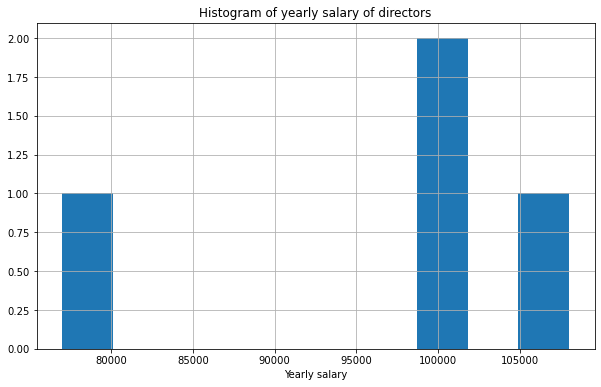

In [113]:
plt.figure(figsize=(10,6))
data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Director'].hist()
plt.title('Histogram of yearly salary of directors')
plt.xlabel('Yearly salary')
plt.show()

In [107]:
print('The mean yearly salary of directors is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Director'].mean()))
print('The median yearly salary of directors is {} euros'.format(data['Yearly brutto salary (without bonus and stocks) in EUR'][data['Seniority level']=='Director'].median()))

The mean yearly salary of directors is 96250.0 euros
The median yearly salary of directors is 100000.0 euros


The yearly salary of employees increases with the seniority level attained

In [56]:
data['Your main technology / programming language'][data['Position ']=='Software Engineer'].value_counts()

Java                                81
C++                                 29
PHP                                 26
Python                              21
C#                                  19
.NET                                11
Javascript                          11
Scala                               10
Go                                  10
JavaScript                          10
TypeScript                           7
C                                    6
Ruby                                 6
Kotlin                               5
python                               5
.net                                 5
javascript                           4
Python                               4
java                                 4
Swift                                4
iOS                                  4
JavaScript                           4
Typescript                           4
ABAP                                 3
php                                  3
C#, .net core            

Most software engineers reported their main programming language to be Java

In [57]:
data['Your main technology / programming language'][data['Position ']=='Data Scientist'].value_counts()

Python                       63
Python                       12
python                       10
R                             5
SQL                           2
C++                           2
Spark                         1
Python, SQL                   1
SAS,SQL,Python                1
Python, cloud computing       1
Pyrhon                        1
Sql, BQ, tableau, gtm, ga     1
sql                           1
Python, statistics, SQL       1
Python + SQL                  1
several                       1
Ml/Python                     1
spark                         1
Name: Your main technology / programming language, dtype: int64

Most data scientists surveyed reported their primary programming language to be Python

In [58]:
data['Your main technology / programming language'][data['Position ']=='Backend Developer'].value_counts()

Java                  53
PHP                   24
Python                12
Ruby                  11
Scala                  9
Kotlin                 7
Go                     6
Elixir                 4
php                    4
C#                     4
Php                    3
python                 3
C++                    2
Ruby on Rails          2
java                   2
Golang                 1
Magento                1
NodeJS                 1
Node.js                1
PHP/MySQL              1
NodeJS/TS              1
Perl                   1
Grails, Groovy         1
.net                   1
Kotlin/PHP             1
Spring                 1
go                     1
Java                   1
C                      1
JS                     1
Golang                 1
Nodejs                 1
Java, angular, Aws     1
C# .NET                1
Web developer          1
Javascript             1
Java/Scala             1
.NET                   1
Name: Your main technology / programming language,

Most backend developers reported their primary programming language to be Java.

* Comparing positions according to city of work

__Berlin__

In [60]:
db=data[data['City']=='Berlin']
db

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,cat_salary,cat_bonus
1,26.0,Male,Berlin,Backend Developer,7.0,Senior,Ruby,NaN,80000.0,NaN,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"(70000, 80000]",NaN
2,29.0,Male,Berlin,Software Engineer,12.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.00,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,"(100000, 1000000]","(100000.0, 1000000.0]"
3,28.0,Male,Berlin,Frontend Developer,4.0,Junior,Javascript,NaN,54000.0,NaN,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,"(50000, 60000]",NaN
4,37.0,Male,Berlin,Backend Developer,17.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"(60000, 70000]",NaN
5,32.0,Male,Berlin,DevOps,5.0,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,5000.00,30.0,Full-time employee,Unlimited contract,English,11-50,Startup,No,"(70000, 80000]","(0.0, 10000.0]"
6,37.0,Male,Berlin,Frontend Developer,6.0,Middle,Javascript,NaN,57000.0,NaN,24.0,Full-time employee,Unlimited contract,English,11-50,Product,No,"(50000, 60000]",NaN
7,24.0,Male,Berlin,Frontend Developer,5.0,Senior,Typescript,Javascript / Typescript,65000.0,NaN,27.0,Full-time employee,Unlimited contract,English,1000+,Product,No,"(60000, 70000]",NaN
8,29.0,Male,Berlin,Backend Developer,8.0,Senior,PHP,"SQL, AWS, Docker",56000.0,NaN,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"(50000, 60000]",NaN
9,35.0,Male,Berlin,Software Engineer,15.0,Lead,Java,NaN,95000.0,NaN,30.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"(90000, 100000]",NaN
11,NaN,Male,Berlin,Software Engineer,25.0,Senior,C++,"Python, C/C++, SQL",100000.0,101.00,24.0,Self-employed (freelancer),Temporary contract,English,11-50,Product,Yes,"(90000, 100000]","(0.0, 10000.0]"


In [61]:
print('The mean yearly bonus of software engineers in Berlin is {} euros'.format(db['Yearly bonus + stocks in EUR'][db['Position ']=='Software Engineer'].mean()))
print('The median yearly bonus of software engineers in Berlin is {} euros'.format(db['Yearly bonus + stocks in EUR'][db['Position ']=='Software Engineer'].median()))

The mean yearly bonus of software engineers in Berlin is 22672.621848739494 euros
The median yearly bonus of software engineers in Berlin is 7000.0 euros


In [62]:
print('The mean yearly salary of software engineers in Berlin is {} euros'.format(db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Software Engineer'].mean()))
print('The median yearly salary of software engineers in Berlin is {} euros'.format(db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Software Engineer'].median()))

The mean yearly salary of software engineers in Berlin is 75685.44502617801 euros
The median yearly salary of software engineers in Berlin is 75000.0 euros


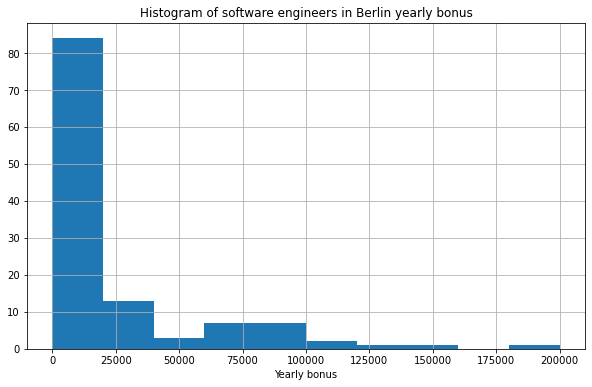

In [63]:
plt.figure(figsize=(10,6))
db['Yearly bonus + stocks in EUR'][db['Position ']=='Software Engineer'].hist()
plt.title('Histogram of software engineers in Berlin yearly bonus')
plt.xlabel('Yearly bonus')
plt.show()

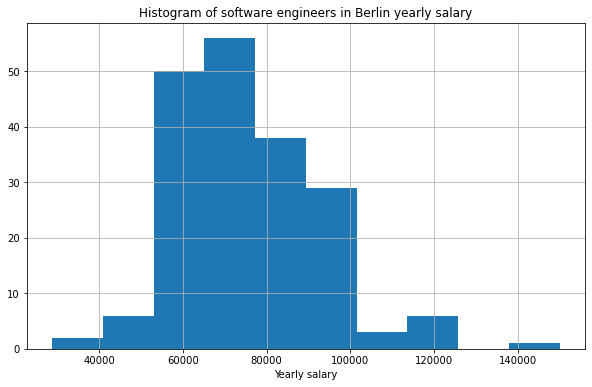

In [64]:
plt.figure(figsize=(10,6))
db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Software Engineer'].hist()
plt.title('Histogram of software engineers in Berlin yearly salary')
plt.xlabel('Yearly salary')
plt.show()

In [65]:
print('The mean yearly salary of backend developers in Berlin is {} euros'.format(db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Backend Developer'].mean()))
print('The median yearly salary of backend developers in Berlin is {} euros'.format(db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Backend Developer'].median()))

The mean yearly salary of backend developers in Berlin is 71869.0 euros
The median yearly salary of backend developers in Berlin is 70000.0 euros


In [66]:
print('The mean yearly bonus of backend developers in Berlin is {} euros'.format(db['Yearly bonus + stocks in EUR'][db['Position ']=='Backend Developer'].mean()))
print('The median yearly bonus of backend developers in Berlin is {} euros'.format(db['Yearly bonus + stocks in EUR'][db['Position ']=='Backend Developer'].median()))

The mean yearly bonus of backend developers in Berlin is 24562.5 euros
The median yearly bonus of backend developers in Berlin is 2500.0 euros


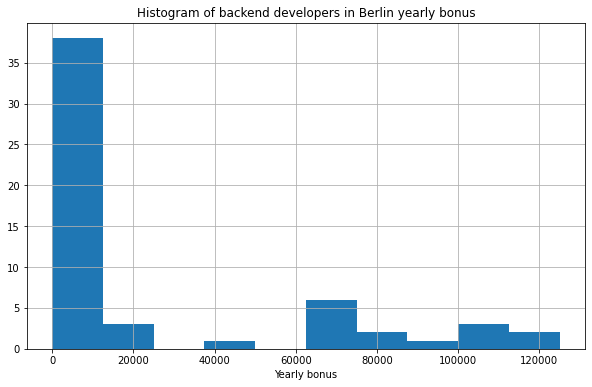

In [67]:
plt.figure(figsize=(10,6))
db['Yearly bonus + stocks in EUR'][db['Position ']=='Backend Developer'].hist()
plt.title('Histogram of backend developers in Berlin yearly bonus')
plt.xlabel('Yearly bonus')
plt.show()

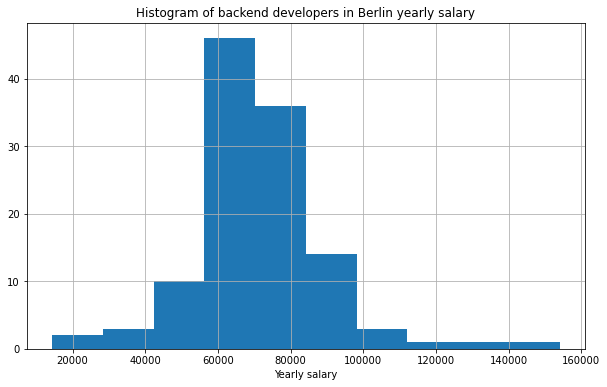

In [68]:
plt.figure(figsize=(10,6))
db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Backend Developer'].hist()
plt.title('Histogram of backend developers in Berlin yearly salary')
plt.xlabel('Yearly salary')
plt.show()

In [69]:
print('The mean yearly salary of data scientists in Berlin is {} euros'.format(db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Data Scientist'].mean()))
print('The median yearly salary of data scientists in Berlin is {} euros'.format(db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Data Scientist'].median()))

The mean yearly salary of data scientists in Berlin is 72191.17647058824 euros
The median yearly salary of data scientists in Berlin is 70000.0 euros


In [70]:
print('The mean yearly bonus of data scientists in Berlin is {} euros'.format(db['Yearly bonus + stocks in EUR'][db['Position ']=='Data Scientist'].mean()))
print('The median yearly bonus of data scientists in Berlin is {} euros'.format(db['Yearly bonus + stocks in EUR'][db['Position ']=='Data Scientist'].median()))

The mean yearly bonus of data scientists in Berlin is 25742.55319148936 euros
The median yearly bonus of data scientists in Berlin is 10000.0 euros


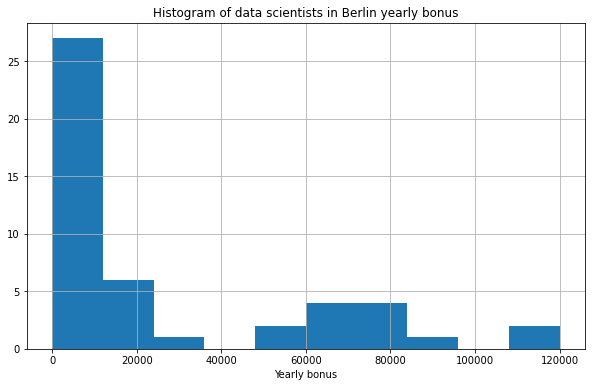

In [71]:
plt.figure(figsize=(10,6))
db['Yearly bonus + stocks in EUR'][db['Position ']=='Data Scientist'].hist()
plt.title('Histogram of data scientists in Berlin yearly bonus')
plt.xlabel('Yearly bonus')
plt.show()

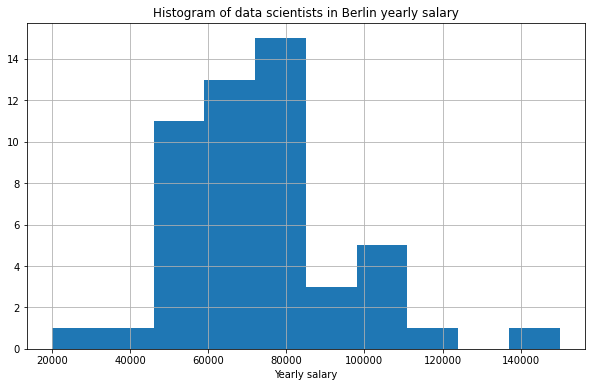

In [72]:
plt.figure(figsize=(10,6))
db['Yearly brutto salary (without bonus and stocks) in EUR'][db['Position ']=='Data Scientist'].hist()
plt.title('Histogram of data scientists in Berlin yearly salary')
plt.xlabel('Yearly salary')
plt.show()

In [73]:
print('The mean number of vacation days for developers in Berlin is {}'.format(db['Number of vacation days'].mean()))


The mean number of vacation days for developers in Berlin is 29.09553158705701


In [74]:
db['Main language at work'].value_counts()

English               612
German                 60
English and German      1
Deuglisch               1
Name: Main language at work, dtype: int64

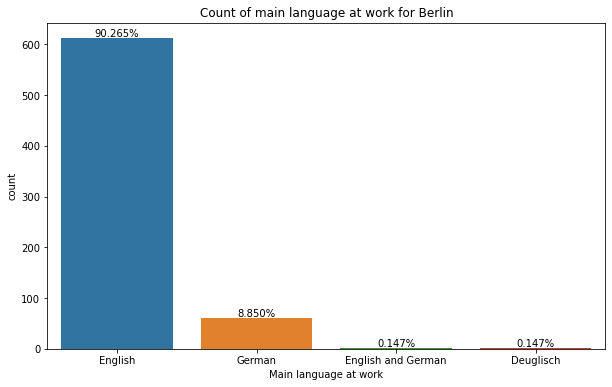

In [75]:
plt.figure(figsize=(10,6))
total=float(len(db['Main language at work']))
main=sns.countplot(x='Main language at work', data=db)
for g in main.patches:
    height=g.get_height()
    main.text(g.get_x()+g.get_width()/2, height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Count of main language at work for Berlin')
plt.xlabel('Main language at work')
plt.show()

__Munich__

In [76]:
dm=data[data['City']=='Munich']
dm

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,cat_salary,cat_bonus
0,26.0,Male,Munich,Software Engineer,5.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,No,"(70000, 80000]","(0.0, 10000.0]"
56,35.0,Male,Munich,Software Engineer,11.0,Senior,Php,"Javascript / Typescript, AWS, Kubernetes, Docker",65000.0,5000.0,29.0,Full-time employee,Unlimited contract,German,101-1000,Product,No,"(60000, 70000]","(0.0, 10000.0]"
57,33.0,Male,Munich,DevOps,15.0,Lead,Kubernetes,"AWS, Google Cloud, Azure, Docker",90000.0,10000.0,30.0,Full-time employee,Unlimited contract,NaN,101-1000,Product,No,"(80000, 90000]","(0.0, 10000.0]"
59,66.0,Male,Munich,Software Engineer,40.0,Lead,ruby on rails,"Javascript / Typescript, Ruby, SQL",70000.0,NaN,30.0,Full-time employee,Unlimited contract,German,51-100,Product,No,"(60000, 70000]",NaN
61,28.0,Male,Munich,Backend Developer,5.0,Senior,Kotlin,"Kotlin, Javascript / Typescript, Java / Scala,...",72000.0,NaN,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"(70000, 80000]",NaN
62,34.0,Male,Munich,Frontend Developer,5.0,Senior,JavaScript/ES6,NaN,73500.0,NaN,27.0,Full-time employee,Unlimited contract,English,11-50,Product,No,"(70000, 80000]",NaN
63,34.0,Male,Munich,Software Engineer,13.0,Lead,.NET,".NET, SQL",72000.0,72000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,No,"(70000, 80000]","(70000.0, 80000.0]"
64,32.0,Male,Munich,Frontend Developer,7.0,Senior,Javascript,"Javascript / Typescript, Java / Scala",62000.0,NaN,30.0,Full-time employee,Unlimited contract,German,101-1000,Consulting / Agency,No,"(60000, 70000]",NaN
71,36.0,Male,Munich,Backend Developer,15.0,Senior,java,PHP,55000.0,NaN,28.0,Full-time employee,Unlimited contract,English,1000+,Product,No,"(50000, 60000]",NaN
73,29.0,Male,Munich,Software Engineer,7.0,Senior,JavaScript,"Kotlin, Javascript / Typescript, Java / Scala,...",80000.0,5000.0,24.0,Full-time employee,Unlimited contract,English,1000+,Product,No,"(70000, 80000]","(0.0, 10000.0]"


In [77]:
print('The mean yearly bonus of software engineers in Munich is {} euros'.format(dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Software Engineer'].mean()))
print('The median yearly bonus of software engineers in Munich is {} euros'.format(dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Software Engineer'].median()))

The mean yearly bonus of software engineers in Munich is 21658.698412698413 euros
The median yearly bonus of software engineers in Munich is 5000.0 euros


In [118]:
print('The mean yearly salary of software engineers in Munich is {} euros'.format(dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Software Engineer'].mean()))
print('The median yearly salary of software engineers in Munich is {} euros'.format(dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Software Engineer'].median()))

The mean yearly salary of software engineers in Munich is 79375.46666666666 euros
The median yearly salary of software engineers in Munich is 75000.0 euros


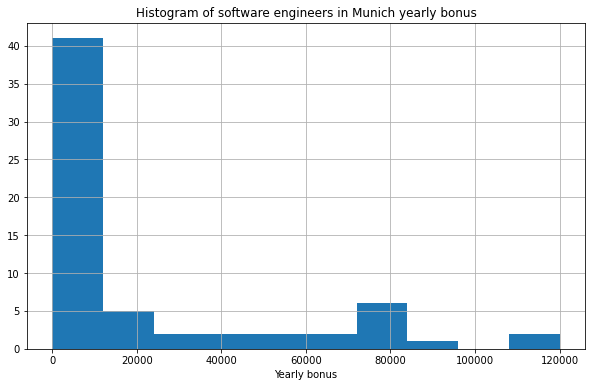

In [79]:
plt.figure(figsize=(10,6))
dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Software Engineer'].hist()
plt.title('Histogram of software engineers in Munich yearly bonus')
plt.xlabel('Yearly bonus')
plt.show()

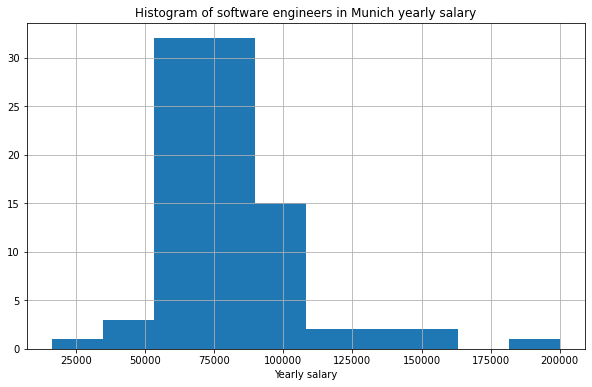

In [80]:
plt.figure(figsize=(10,6))
dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Software Engineer'].hist()
plt.title('Histogram of software engineers in Munich yearly salary')
plt.xlabel('Yearly salary')
plt.show()

In [81]:
print('The mean yearly salary of backend developers in Munich is {} euros'.format(dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Backend Developer'].mean()))
print('The median yearly salary of backend developers in Munich is {} euros'.format(dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Backend Developer'].median()))

The mean yearly salary of backend developers in Munich is 75133.33333333333 euros
The median yearly salary of backend developers in Munich is 75000.0 euros


In [82]:
print('The mean yearly bonus of backend developers in Munich is {} euros'.format(dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Backend Developer'].mean()))
print('The median yearly bonus of backend developers in Munich is {} euros'.format(dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Backend Developer'].median()))

The mean yearly bonus of backend developers in Munich is 12931.578947368422 euros
The median yearly bonus of backend developers in Munich is 5000.0 euros


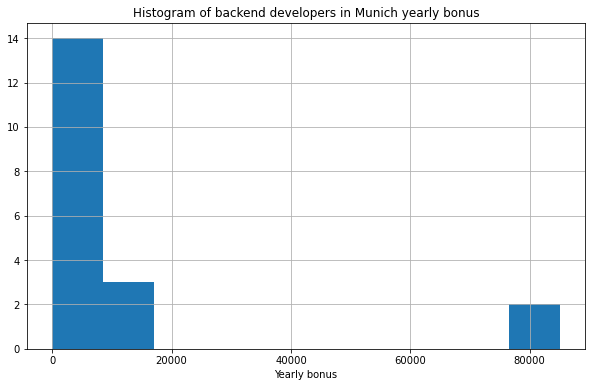

In [83]:
plt.figure(figsize=(10,6))
dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Backend Developer'].hist()
plt.title('Histogram of backend developers in Munich yearly bonus')
plt.xlabel('Yearly bonus')
plt.show()

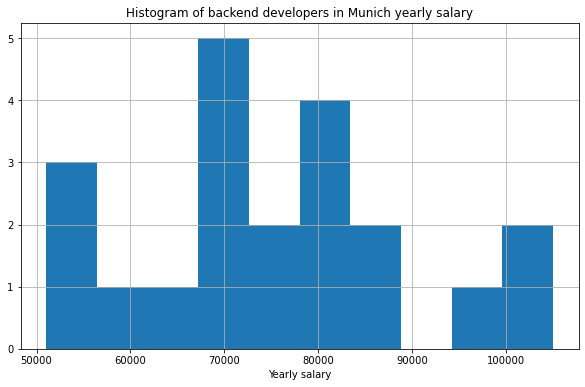

In [84]:
plt.figure(figsize=(10,6))
dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Backend Developer'].hist()
plt.title('Histogram of backend developers in Munich yearly salary')
plt.xlabel('Yearly salary')
plt.show()

In [85]:
print('The mean yearly salary of data scientists in Munich is {} euros'.format(dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Data Scientist'].mean()))
print('The median yearly salary of data scientists in Munich is {} euros'.format(dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Data Scientist'].median()))

The mean yearly salary of data scientists in Munich is 85875.0 euros
The median yearly salary of data scientists in Munich is 67500.0 euros


In [86]:
print('The mean yearly bonus of data scientists in Munich is {} euros'.format(dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Data Scientist'].mean()))
print('The median yearly bonus of data scientists in Munich is {} euros'.format(dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Data Scientist'].median()))

The mean yearly bonus of data scientists in Munich is 16250.0 euros
The median yearly bonus of data scientists in Munich is 10000.0 euros


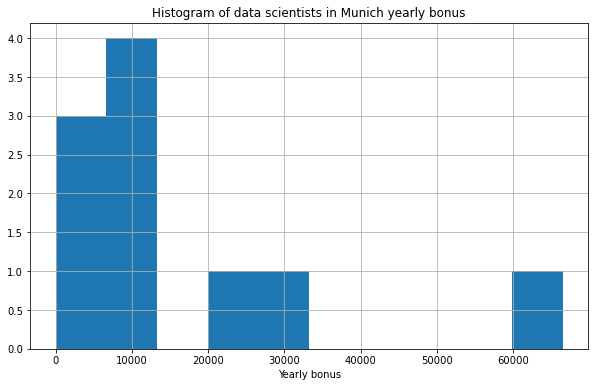

In [87]:
plt.figure(figsize=(10,6))
dm['Yearly bonus + stocks in EUR'][dm['Position ']=='Data Scientist'].hist()
plt.title('Histogram of data scientists in Munich yearly bonus')
plt.xlabel('Yearly bonus')
plt.show()

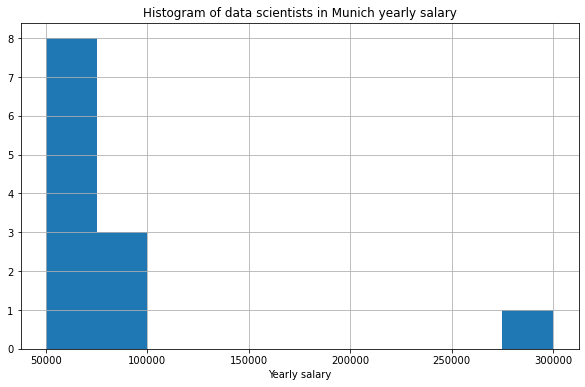

In [88]:
plt.figure(figsize=(10,6))
dm['Yearly brutto salary (without bonus and stocks) in EUR'][dm['Position ']=='Data Scientist'].hist()
plt.title('Histogram of data scientists in Munich yearly salary')
plt.xlabel('Yearly salary')
plt.show()

In [89]:
print('The mean number of vacation days for developers in Munich is {}'.format(dm['Number of vacation days'].mean()))

The mean number of vacation days for developers in Munich is 29.237885462555067


By comparing both yearly salary and yearly bonus of both cities in Germany, we see that there is not much difference between what software engineers, backend developers and data scientists in Berlin earn to what their counterparts in Munich earn.